# CSE 5243:  Spring 2021
### Overview of Python and Jupyter Notebooks

updated by J. Van Hulse, January 2020  
updated by Gregory Ryslik, August 2021

Python has become the standard language in data science and machine learning due to its ease of use and large number of third-party libraries that augment the standard packages. Furthermore, Jupyter notebooks have become the default Python environments for doing data analysis or modeling. 

Python is a general purpose programming language, so this notebook provides an overview of Python as it relates to data mining and analysis effort. In addition, you will be exposure to the Jupyter notebook environment. 

Note that I will work in Python version 3. You should do the same. 


## Basic Data Structures in Python

Besides the usual data types like String, Int, and Boolean, there are three additional data structures that are commonly uesd: `list`, `dictionary`, and `tuple`

In [1]:
my_list = [1, 2, 3, 4, 5]
print(my_list)

[1, 2, 3, 4, 5]


Python lists are mutable (i.e., the values can change) and they can contain different data types

In [2]:
my_second_list = [1, "Fred", True]
print(my_second_list)

[1, 'Fred', True]


Individual elements of a list can be accessed using the index position of the list:

In [3]:
print(my_second_list[1])

Fred


**Tuples** are similar to lists, but they are immutable. Use tuples to hold constants that you do not want to change.

In [4]:
my_tuple = (2, 5, 10)
my_tuple[0] = 12 #I can't assign 2 to the first element of the tuple. 

TypeError: 'tuple' object does not support item assignment

**Dictionaries** are used to hold data which has a **key-value pair** relationship. 

In [5]:
import datetime
my_dictionary = {'name':'George Washington', 'Year of Birth': 1732}
print(my_dictionary)

{'name': 'George Washington', 'Year of Birth': 1732}


You can access a particular value in the dictionary by specifying the key as follows:

In [6]:
print(my_dictionary['Year of Birth'])

1732


You can also update a value or even add new key-value pairs:

In [7]:
my_dictionary['Year of Death'] =  1799
print(my_dictionary)

{'name': 'George Washington', 'Year of Birth': 1732, 'Year of Death': 1799}


## Conditional Statements

Python has the usual constructs to control program flow, such as the `if` statement:

In [8]:
a = 15

if a < 10:
    print(0)
elif a == 10:
    print(1)
else:
    print(2)

2


Here is an example of a `for` loop. When creating a for loop, it is useful to define an **iterable** that the loop can iterate over. In this example, the iterable that I created uses the *range* function. Iterables can be lists, dictionaries, or strings, among many other data types. 

In [9]:
for i in range(5):
    print(i)

0
1
2
3
4


Here's a fun example combining nested if statements an. We would like to find positive integers $p, q, \mbox{ and } r$ such that the equation

$$
1 = \frac{1}{42} + \frac{1}{p} + \frac{1}{q} + \frac{1}{r}
$$

is true. 

In [10]:
for p in range(1, 100):
    for q in range(1, 100):
        for r in range(1, 100):
            if 1/42 + 1/p + 1/q + 1/r == 1:
                print(p, q, r)

2 3 7
2 7 3
3 2 7
3 7 2
7 2 3
7 3 2


The Python packages `pandas`, `numpy` and `matplotlib` are very useful data science utilities. Many programs will start by importing these packages. 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A little bit on NumPy

NumPy is a Python package that provides a set of capabilities to store and operate on dense data. It is kind of like a Python list, but NumPy arrays provide much more efficient storage and data operations as the size of the data grows. 

In [12]:
#this is a code cell. Commands entered into a code cell will be executed by the interpreter. 
x = np.random.normal(size=500)   # generate a numpy array of normally distributed random values

In a `numpy` array, you can access individual entries or a range of entries

In [13]:
x[0:5]

array([-0.40591898,  1.05186813, -0.25292239, -0.66486997,  1.25334514])

(array([  7.,  23.,  52.,  99., 120., 113.,  53.,  23.,   7.,   3.]),
 array([-2.79238361, -2.18942972, -1.58647582, -0.98352193, -0.38056804,
         0.22238585,  0.82533975,  1.42829364,  2.03124753,  2.63420142,
         3.23715532]),
 <BarContainer object of 10 artists>)

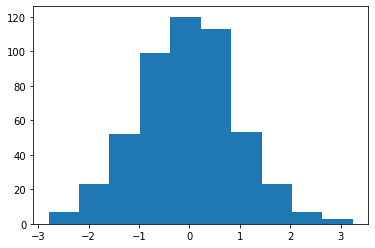

In [14]:
plt.hist(x)

You can also creat random matrices of different sizes:

In [15]:
x2 = np.random.randint(10, size = (4,6))
print(x2)
print("Number of Dimenstions: ", x2.ndim)
print("Shape: ", x2.shape)

[[3 1 6 1 2 4]
 [5 6 3 6 4 9]
 [6 6 4 4 5 3]
 [0 0 8 1 0 9]]
Number of Dimenstions:  2
Shape:  (4, 6)


You can access parts of the matrix using the slice notation (:)

In [16]:
print("The first two rows of x2: ")
print(x2[:2])
print("The first three columns of x2:")
print(x2[:, :3])

The first two rows of x2: 
[[3 1 6 1 2 4]
 [5 6 3 6 4 9]]
The first three columns of x2:
[[3 1 6]
 [5 6 3]
 [6 6 4]
 [0 0 8]]


### Vectorizing versus Looping

Looping in Python is extremely slow. The preferred approach is to used **vectorized operations**, which apply the function to the entire array. In the following code, we use the Python *magic* command %timeit, which measures the time to execute a single statement by using a repeated execution. 

It runs the code for *n* number of loops *r* times, and returns the best average of the *r* runs. 

In [17]:
#addition of two arrays using loops

a = np.random.rand(1000000)
b = np.random.rand(1000000)
c = np.zeros(1000000)

def compute_sum():
    for i in range(1000000):
        c[i] = a[i] + b[i]
    
%timeit -n 3 -r 5 compute_sum()

#vectorized addition of the same two arrays
def compute_sum2():
    c = a + b

%timeit -n 3 -r 5 compute_sum2()

314 ms ± 8.53 ms per loop (mean ± std. dev. of 5 runs, 3 loops each)
3.32 ms ± 558 µs per loop (mean ± std. dev. of 5 runs, 3 loops each)


In [ ]:
#Use this command if you want to get additional information on the timeit function
%timeit?

## The Pandas Package

### Series

The Pandas package provides three fundamental data structures: `Series`, `DataFrame`, `Index`. The Series and DataFrame data structures can be thought of as enhanced versions of the NumPy array. 

In [18]:
countries = pd.Series(["China","India","USA","Indonesia","Pakistan","Brazil","Nigeria","Bangladesh","Russia"])

pop2019 = pd.Series([1433783686, 1366417754, 329064917, 270625568, 216565318, 211049527, 200963599, 163046161, 145872256], index = countries)
pop2018 = pd.Series([1427647786, 1352642280, 327096265, 267670543, 212228286, 209469323, 195874683, 161376708, 145734038 ], index = countries)


In [19]:
print(countries)

0         China
1         India
2           USA
3     Indonesia
4      Pakistan
5        Brazil
6       Nigeria
7    Bangladesh
8        Russia
dtype: object


In [20]:
print(pop2019)

China         1433783686
India         1366417754
USA            329064917
Indonesia      270625568
Pakistan       216565318
Brazil         211049527
Nigeria        200963599
Bangladesh     163046161
Russia         145872256
dtype: int64


A `Series` is a one-dimensional indexed array. The difference between a `Series` and a `NumPy` array is that a `NumPy` array has an implicitly defined integer index, while a `Series` has an explicity defined index. 

You can access any element of the Series by referring to the key:

In [ ]:
print("The population of the United States in 2019 is: ", pop2019['USA'])

If you want to access only the values of the `Series`, you can access the `values` attribute of the `Series`:

In [ ]:
pop2019.values

### Data Frame

`DataFrame` is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table. Another way to think of a `DataFrame` is as a two-dimensional array with flexible row indices and column names. 

There are many different ways to build a `DataFrame`.  One way is to use a dictionary to construct a single two-dimensional object: 

In [21]:
population = pd.DataFrame({'population2018': pop2018, 'population2019': pop2019})

In [22]:
population.head()

,population2018,population2019
China,1427647786,1433783686
India,1352642280,1366417754
USA,327096265,329064917
Indonesia,267670543,270625568
Pakistan,212228286,216565318


You can access the column names and index values by accessing the following attributes of the `DataFrame`:

In [ ]:
population.columns

In [ ]:
population.index

#### Accessing entries in a Data Frame

There are a few ways to access the rows of a `DataFrame`. First, the `iloc` indexer uses the implicit numeric style index. the `loc` indexer will use the explicit index. For example, both of the below commands will return the values for population values for India:

In [23]:
population.iloc[1]

population2018    1352642280
population2019    1366417754
Name: India, dtype: int64

In [24]:
population.loc['India']

population2018    1352642280
population2019    1366417754
Name: India, dtype: int64

You can also access a range of rows as follows:

In [25]:
population.iloc[1:3]

,population2018,population2019
India,1352642280,1366417754
USA,327096265,329064917


In [26]:
population.loc['India':'Brazil']

,population2018,population2019
India,1352642280,1366417754
USA,327096265,329064917
Indonesia,267670543,270625568
Pakistan,212228286,216565318
Brazil,209469323,211049527


You can slice both rows and columns

In [27]:
population.loc['India':'Pakistan', :'population2018']

,population2018
India,1352642280
USA,327096265
Indonesia,267670543
Pakistan,212228286


In [28]:
population.iloc[:2, 1:]

,population2019
China,1433783686
India,1366417754


In [29]:
population.describe()

,population2018,population2019
count,9.000000e+00,9.000000e+00
mean,4.777489e+08,4.819321e+08
std,5.204360e+08,5.236554e+08
min,1.457340e+08,1.458723e+08
25%,1.958747e+08,2.009636e+08
50%,2.122283e+08,2.165653e+08
75%,3.270963e+08,3.290649e+08
max,1.427648e+09,1.433784e+09


In [30]:
population.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, China to Russia
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   population2018  9 non-null      int64
 1   population2019  9 non-null      int64
dtypes: int64(2)
memory usage: 536.0+ bytes


Finally, you can extract observations that meet a specific criteria. For example, suppose we wanted to extract the countries with a population less than 1 Billion. We can first create a boolean mask with the condition that we would like to specify:

In [31]:
population['population2019']< 1000000000

China         False
India         False
USA            True
Indonesia      True
Pakistan       True
Brazil         True
Nigeria        True
Bangladesh     True
Russia         True
Name: population2019, dtype: bool

Next, we can give the boolean mask to the .loc operator to extract the rows of interest:

In [33]:
population.loc[population['population2019']< 1000000000]

,population2018,population2019
USA,327096265,329064917
Indonesia,267670543,270625568
Pakistan,212228286,216565318
Brazil,209469323,211049527
Nigeria,195874683,200963599
Bangladesh,161376708,163046161
Russia,145734038,145872256


New columns can be created from existing colums in the data frame. For example, let's compute the population growth between 2018 and 2019 and label the column 'Growth.' Note that we do not need to create a loop to iterate through the data frame; the computation is automatically vectorized. 

In [34]:
population['Growth'] = 100* (population['population2019']-population['population2018'])/population['population2018']
population

,population2018,population2019,Growth
China,1427647786,1433783686,0.429791
India,1352642280,1366417754,1.018412
USA,327096265,329064917,0.601857
Indonesia,267670543,270625568,1.103978
Pakistan,212228286,216565318,2.043569
Brazil,209469323,211049527,0.754384
Nigeria,195874683,200963599,2.598047
Bangladesh,161376708,163046161,1.034507
Russia,145734038,145872256,0.094843


You can also import data in a variety of formats from a URL into a pandas data frame.  For example, this code imports the IRIS dataset, stored as a simple CSV file, from the UC Irvine Machine Learning repository, creating a data frame with 5 columns. 

In [35]:
iris_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
iris = pd.read_csv(iris_url, sep=',')

attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris.columns = attributes

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


### Creating Functions

Like any programming language, Python allows you to create user defined functions. Two new keywords are introduced: `def` and `return`. Functions can accept arguments and can return a value back to the code that invoked the function. Finally, functions can include comments which explain what the function does. Triple-quotes create what are called a **docstring** which can be accessed using the `help` function. 

In [36]:
def average(a, b):
    """This function returns the average of two numbers"""
    return (a + b)/2

print(average(10, 20))

15.0


In [38]:
help(average)

Help on function average in module __main__:

average(a, b)
    This function returns the average of two numbers



In [39]:
average(10, 11, 12)

TypeError: average() takes 2 positional arguments but 3 were given

We have only defined the average function to take two arguments, but clearly we would like to be able to extend this function to an unknown number of arguments. 

In [40]:
def average_general(*args):
    """This is a more general version of the average function which will take the average of any number of arguments"""
    summation = 0
    num = 0
    for a in args:
        summation += a
        num += 1
    return summation/num

average_general(10,11,12, 13)

11.5

## Reading data from a file into a DataFrame

In [41]:
iris = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, 
                   names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [42]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [43]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Some useful tricks and tips

There are a few different ways to get information on functions or modules in Python. For example, you can find additional information on the Python `list` data structure:

`help(list)`

`list?`

In [44]:
help(list)

Help on class list in module builtins:

class list(object)
 |  list(iterable=(), /)
 |  
 |  Built-in mutable sequence.
 |  
 |  If no argument is given, the constructor creates a new empty list.
 |  The argument must be an iterable if specified.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __delitem__(self, key, /)
 |      Delete self[key].
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  __getitem__(...)
 |      x.__getitem__(y) <==> x[y]
 |  
 |  __gt__(self, value, /)
 |      Return self>value.
 |  
 |  __iadd__(self, value, /)
 |      Implement self+=value.
 |  
 |  __imul__(self, value, /)
 |      Implement self*=value.
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self))

Source code of the object or function that you are interested in can be accessed using `??`. In some cases, not much information is displayed because the object or function is not written in Python. Therefore, this shortcut is often most useful with user defined functions. 

In [ ]:
list??

You can use the TAB key for autocompletion and exploration of the contents of objects or modules. Try typing `np.` followed by the TAB key in a code cell. 

In [ ]:
np.

Wildcard matching is useful to search for every object in the name space that contains a particular string. For example, this code returns all objects which have *Warning* in the name:

In [ ]:
*Warning*?

## Further References

Documentation on matplotlib: https://matplotlib.org

Documentation on pandas: https://pandas.pydata.org

*Python Data Science Handbook* by Jake VanderPlas